First 5 rows of the dataset:
   videos_watched  assignments_submitted  forum_posts completed
0              11                      6            5       yes
1              43                      1           11        no
2              37                      1            8        no
3              18                      4           14       yes
4               6                      4           15       yes

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   videos_watched         100 non-null    int64 
 1   assignments_submitted  100 non-null    int64 
 2   forum_posts            100 non-null    int64 
 3   completed              100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

Summary statistics:
       videos_watched  assignments_submitted  forum_posts
count      1

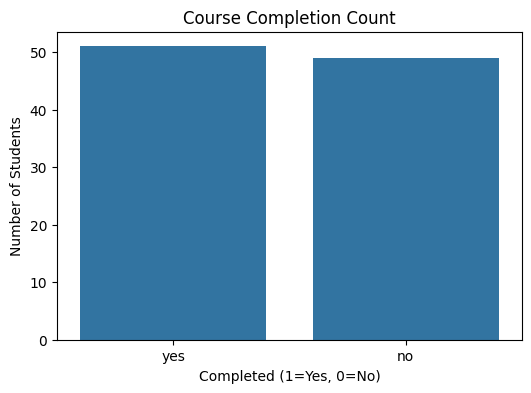


Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.60      0.46      0.52        13

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.49      0.45      0.46        20

Accuracy Score: 0.45


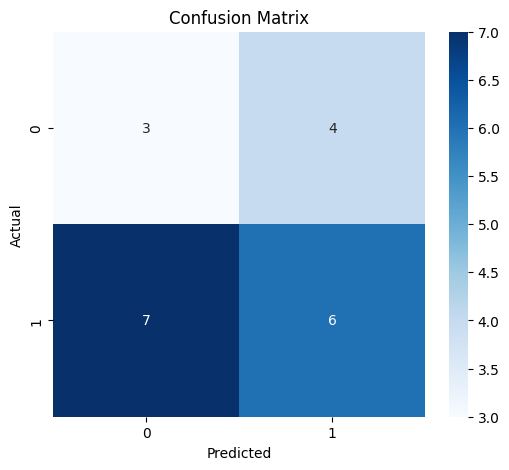

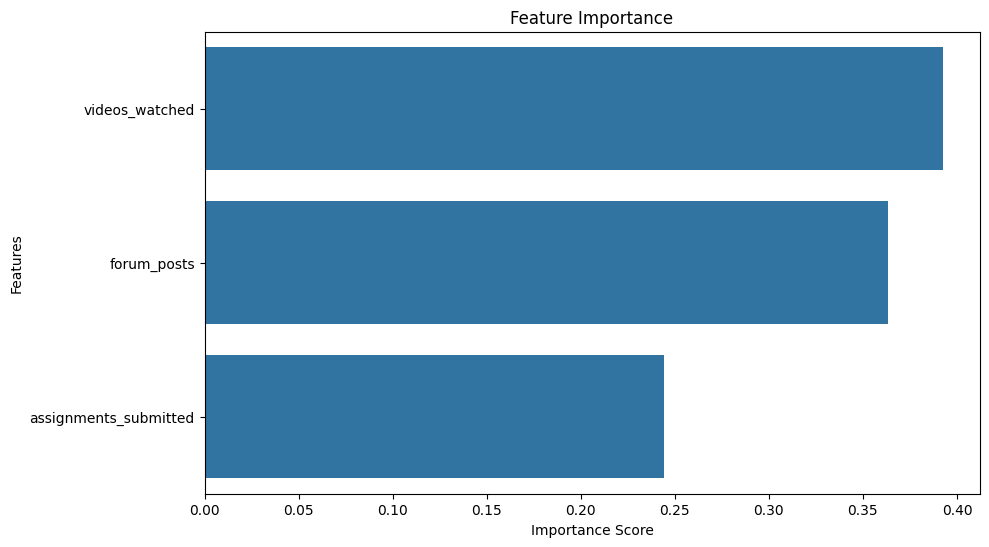

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('/content/online_learning.csv')


print("First 5 rows of the dataset:")
print(df.head())

print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

plt.figure(figsize=(6, 4))
sns.countplot(x='completed', data=df)
plt.title('Course Completion Count')
plt.xlabel('Completed (1=Yes, 0=No)')
plt.ylabel('Number of Students')
plt.show()

df = df.dropna()


label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
X = df.drop('completed', axis=1)
y = df['completed']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()